# Part II - (Ford GoBike System Data Presentation)
## by (Kariem AbuAisheh)

## Investigation Overview


This analysis explores the Ford GoBike bike-sharing dataset for February 2019. The goal is to identify patterns in trip duration, user demographics, and usage trends. We examine factors like user type, gender, age, and time of usage to uncover insights about commuting behavior and ridership distribution.

**Key Insights**
- Subscribers vs. Customers: Most users are Subscribers, who take shorter and more frequent trips, while Customers tend to take longer rides.
- Trip Duration Patterns: The majority of trips last under 16 minutes, with some extreme outliers indicating potential anomalies.
- Gender Distribution: The dataset is heavily skewed towards male riders, with female and "Other" gender categories making up a smaller portion.
- Peak Usage Hours: Usage spikes during morning (7-9 AM) and evening (4-7 PM) rush hours, aligning with typical work commute times.
- Age and Trip Duration: Younger riders (20-40 years) tend to take shorter, more frequent trips, while older riders show more variability in trip length.

## Dataset Overview and Executive Summary

The dataset consists of 183,412 trip records with 16 features, including:

- Trip Details: duration_sec, start_time, end_time.
- Station Information: start_station_name, end_station_name, start_station_latitude, start_station_longitude.
- User Information: user_type (Subscriber/Customer), member_birth_year, member_gender, bike_share_for_all_trip.
- Data Cleaning Steps:

    - Removed missing values in member_birth_year and member_gender.
    - Filtered unrealistic values for age (<10 or >90 years).
    - Capped trip durations at the 95th percentile to reduce the impact of outliers.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

## (Visualization 1)

**Visualization 1: Trip Duration Distribution**
This histogram shows the distribution of trip durations, with values capped at the 95th percentile to remove outliers. The distribution is right-skewed, meaning most trips are short, typically under 20 minutes. The presence of a long tail suggests that a smaller number of trips last significantly longer. The kde (Kernel Density Estimation) curve helps visualize the overall trend of trip durations.

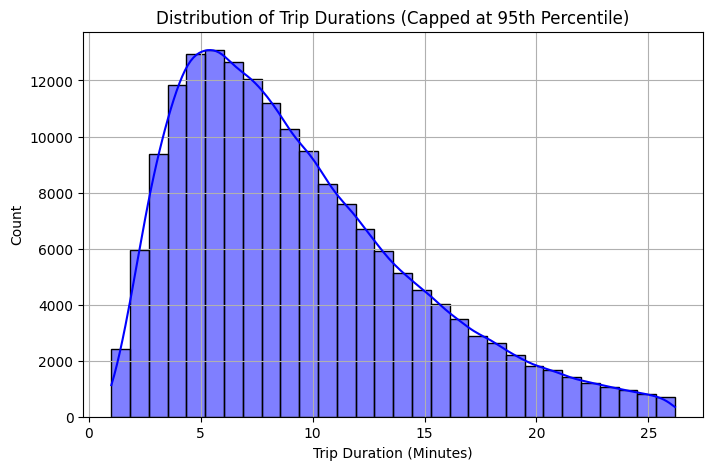

In [8]:
# Convert duration from seconds to minutes
df['duration_min'] = df['duration_sec'] / 60

# Define a cap for visualization (95th percentile)
cap_value = np.percentile(df['duration_min'], 95)

# Visualization 1: Trip Duration Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[df['duration_min'] <= cap_value]['duration_min'], bins=30, kde=True, color='blue')

# Labels and title
plt.title('Distribution of Trip Durations (Capped at 95th Percentile)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


## (Visualization 2)

**Visualization 2: Trip Duration by User Type**
This box plot compares trip durations between Subscribers and Customers. We can see that Customers tend to have longer trips, as indicated by their higher median duration and larger interquartile range (IQR). Subscribers, on the other hand, have shorter and more consistent trip durations. This trend makes sense, as Subscribers are likely commuters, while Customers may be tourists or occasional riders who take longer leisure trips.


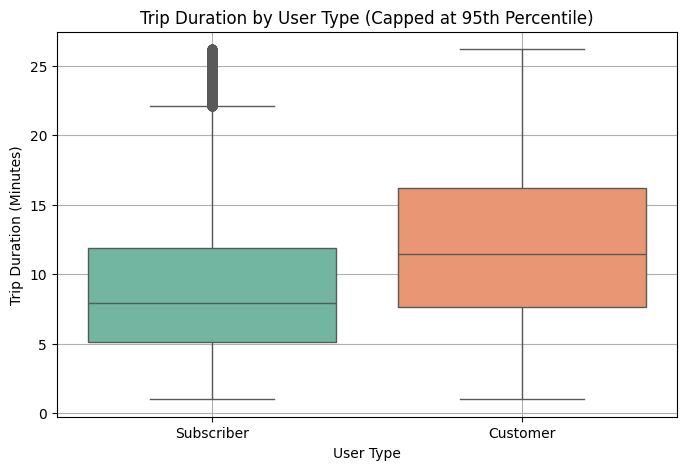

In [9]:
# Visualization 2: Trip Duration by User Type 
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['duration_min'] <= cap_value], x='user_type', y='duration_min', palette="Set2")

# Labels and title
plt.title('Trip Duration by User Type (Capped at 95th Percentile)')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Minutes)')
plt.grid(True)
plt.show()

## (Visualization 3)

**(Visualization 3) Gender Distribution of Riders**
This bar chart shows the distribution of riders based on gender. The dataset is heavily skewed toward male riders, with female and "Other" gender categories making up a smaller portion. This insight suggests that bike-sharing services may be more popular among male users, possibly due to societal, safety, or behavioral factors.


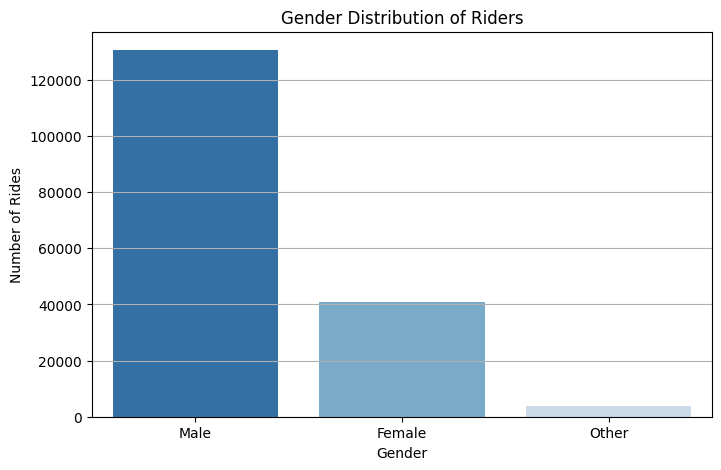

In [10]:
# Visualization 3: Gender Distribution of Riders

gender_counts = df['member_gender'].value_counts()

# Create a bar chart for gender distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Blues_r")

# Labels and title
plt.title('Gender Distribution of Riders')
plt.xlabel('Gender')
plt.ylabel('Number of Rides')
plt.grid(axis='y')
plt.show()


In [ ]:
import shutil
shutil.make_archive('my_project', 'zip', '.')


